# SETUP:
  * Download Jupiter Notebook and data:
      * Follow this link https://github.com/EldaPiedade/ACM and select the green call to action " Clone or Download" to download files.
      * During the first workshop we set up anaconda to work with a jupiter notebook. For a reminder follow this link with instrunctions "How to use jupiter notebook":
          * https://www.youtube.com/watch?v=5mDYijMfSzs <-- For Windows.
          * https://www.youtube.com/watch?v=daVgEXjv6DE <-- For Mac.
 
          
  * Use the data frame and series documentation at your convenience:
    * Use https://pandas.pydata.org/pandas-docs/stable/reference/frame.html for data frames.
    * Use https://pandas.pydata.org/pandas-docs/stable/reference/series.html for series.
    
 
  * To learn python basics please take this free online course:
      * https://www.udacity.com/course/introduction-to-python--ud1110

# What I suggest you do :

Please follow this tutorial completely by reading the Jupiter notebook. When you feel comfortable download the files and experiment changing and understanding the code and the process. The most important thing is that you can reproduce the same or better results obtained on this tutorial.

# Workshop 1 Recap
 During the first workshop we achieved the following:
 * Explored the data and decided to use the columns that contain numerical data only.
 * Identified how many null (NaN values were in each column of data).
 * Deleted all rows (from numerical columns) that contained null values.
 * Create a basic Random Forest model and Understood its mechanism.
 * Learned how to split the data into train and validation sets to test the performance of the model.
 * Finally we created a Kaggle account and submitted our results here -->https://www.kaggle.com/c/house-prices-advanced-regression-techniques
 
# Workshop 2 Summary
For this workshop we will extend the same concepts learned and go a little further:
* We will now use numerical and categorical data to predict homes prices in Iowa. Because models only understand numerical data, we will convert the categorical into numerical data in different ways.
* Instead of deleting the rows of data containing null values and losing information, we will learn different ways to estimate possible values to substitute for the null values.
* We will now create a new model called XBboost. Resources to understand how it works will be available.
* Instead of splitting the data once to validate our model, we will learn how to cross-validate to obtain a better overview of the model's performance.


## Explore Your Data :

In [9]:
# Import main modules
import numpy as np
import pandas as pd
from IPython.display import Image

In [10]:
data = pd.read_csv('data/train.csv', index_col = "Id")

In [11]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


what data types are present?
* int64 are integers, float64 are real numbers, 'O' stands for an object (a string, word, category).
* Let us extract the name of numerical columns and categorical columns and save it to a variable.
* Please refer to python course to understand basic commands, and visit the links on the SETUP cell above.
* Also, tick with the code to understand how it works.

In [12]:
np.unique(data.dtypes)

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

In [13]:
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(exclude=['object']).columns

## Dealing with missing values for categorical and numerical data separately

Datasets as mostly filled with missing data for several reasons. One example could be that someone decided not to respond to a question on a survey. Or maybe data was not available to a specific question. What to do in these cases? We know that our model only understands existing data, and even when it is existing we need to codify to transform it into numbers. Well, there are many procedures and you should familiarize yourself with this dilemma if you want to be a better data scientist. In this tutorial, we will implement simple imputation, label encoding, and one-hot encoding. To avoid longs texts please access the links above to understand each of the concepts.

* For simple imputation watch this video --> https://www.youtube.com/watch?v=EHH78EW3HrQ
* For more advanced KNN imputation watch this video --> https://www.youtube.com/watch?v=T3c7JsLwgpE
* Read about missing data --> https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4

### Numerical Columns

Suppose we have a data set with 300 records and 6 columns. Column 6 has 200 entries missing. One way we could fix this problem is by dropping column 6 since most of its data is missing. now let's suppose column six is missing only 20 entries? Well, should we drop the whole column and potentially lose important information? We have a few options to tailor this problem. We can either substitute the missing values by the mean, mode, or median ( obtained from column 6). Another approach is to substitute missing value by the mean, mode or median, and also add a column to identify which values were missing.

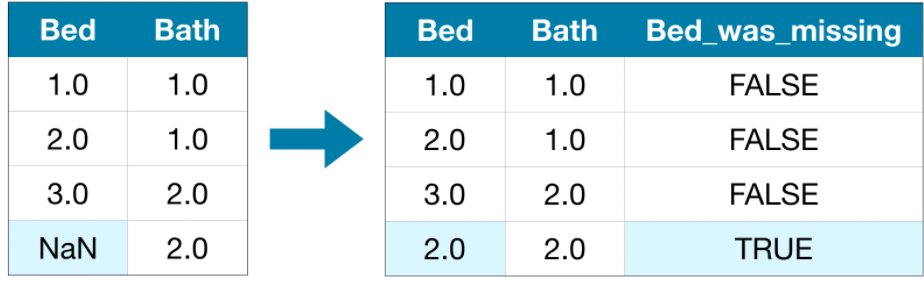

In [14]:
# The mean of column Bed is 2. We substitute NaN with 2. 
# Next we add a column Bed_was_missing and for every missing column add value TRUE.
Image("IMAGES/1.png", width = 400)

How do we know which imputation method is better? Research and Model performance evaluation.
#### Now let's apply simple imputation with added column and without added column to numerical data.

In [15]:
data_numerical = data[numerical_cols]
data_numerical.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [16]:
# Prepare data for training and validation
y = data_numerical.SalePrice
X = data_numerical.drop("SalePrice",axis =1)

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20, random_state=1)

#### Approach 1

MAE from Approach 1 (Imputation):
16657.755650684932


Compared to workshop 1(dropped all rows containing null value), we got better results.


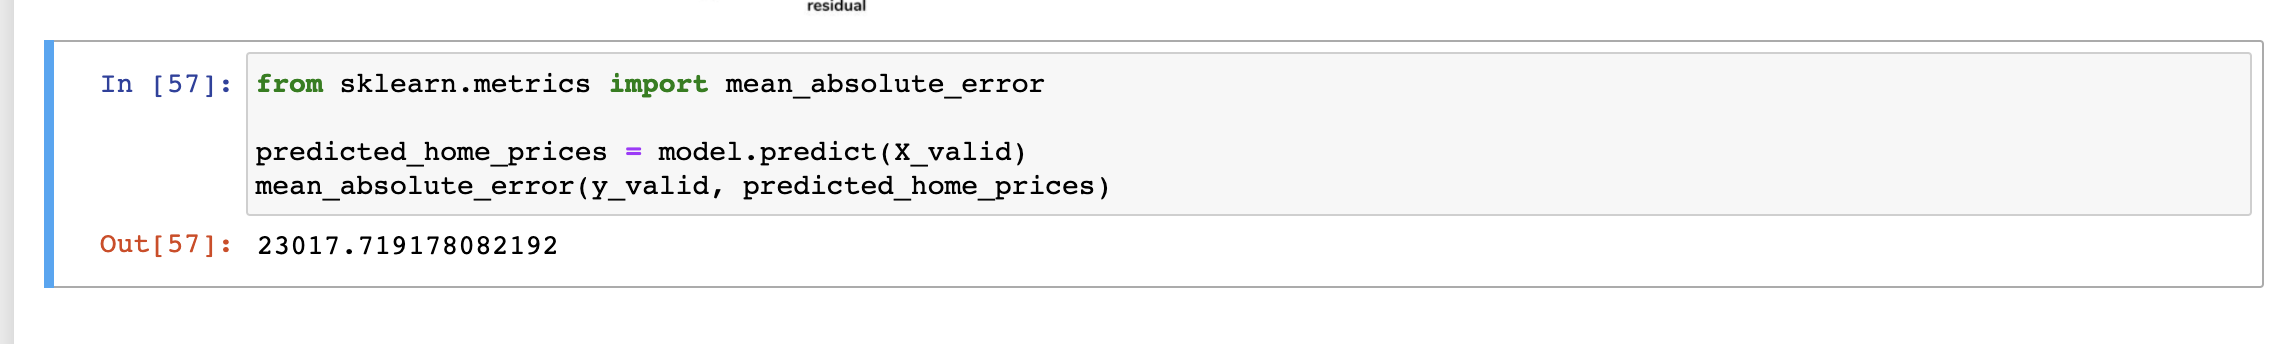

In [19]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


# Imputation
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(my_imputer.transform(X_valid))

# Imputation removed column names; put them back
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns

def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)
    

print("MAE from Approach 1 (Imputation):")
print(score_dataset(imputed_X_train, imputed_X_valid, y_train, y_valid))
print("\n")
print("Compared to workshop 1(dropped all rows containing null value), we got better results.")
Image("IMAGES/2.png", width = 800)

#### Approach 2 ( Add true/false column)

In [20]:
missing_col_series =data_numerical.isnull().sum()[data_numerical.isnull().sum() > 0]
missing_col_series

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [21]:
missing = missing_col_series.index
missing

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [22]:
# Make copy to avoid changing original data (when imputing)
X_train_plus = X_train.copy()
X_valid_plus = X_valid.copy()

# Make new columns indicating what will be imputed
for col in missing:
    X_train_plus[col + '_was_missing'] = X_train_plus[col].isnull()
    X_valid_plus[col + '_was_missing'] = X_valid_plus[col].isnull()

# Imputation
my_imputer = SimpleImputer()
imputed_X_train_plus = pd.DataFrame(my_imputer.fit_transform(X_train_plus))
imputed_X_valid_plus = pd.DataFrame(my_imputer.transform(X_valid_plus))

# Imputation removed column names; put them back
imputed_X_train_plus.columns = X_train_plus.columns
imputed_X_valid_plus.columns = X_valid_plus.columns

print("MAE from Approach 1 (Imputation):")
print(16657.755650684932)
print("MAE from Approach 2 (An Extension to Imputation):")
print(score_dataset(imputed_X_train_plus, imputed_X_valid_plus, y_train, y_valid))

MAE from Approach 1 (Imputation):
16657.755650684932
MAE from Approach 2 (An Extension to Imputation):
16494.63002283105


### Categorical Columns

There is much to say about dealing with categorical data but we will start with simple things. If we have categorical data with two level's we can successfully translate it to a binary variable. Example : male(0) and female(1). If the categorical data is representative of ordered collections, one can rank each category with a number. For example, a master's degree (1), bachelor's degree (2), associate degree (3), High School (4), and so on. This can be done through label encoding. However, when we are dealing with nominal data such as race or nationality, it is incorrect to rank them. In this case, one can use One-Hot encoding to transform each category into a binary column.

* Label encoding -- > https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/
* One-Hot encoding --> https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/
* Read more about data types in machine learning --> https://towardsdatascience.com/7-data-types-a-better-way-to-think-about-data-types-for-machine-learning-939fae99a689
* Dealing with categorical data with Catboost, more advance --> https://medium.com/whats-your-data/working-with-categorical-data-c338122b9521

Label Encoding


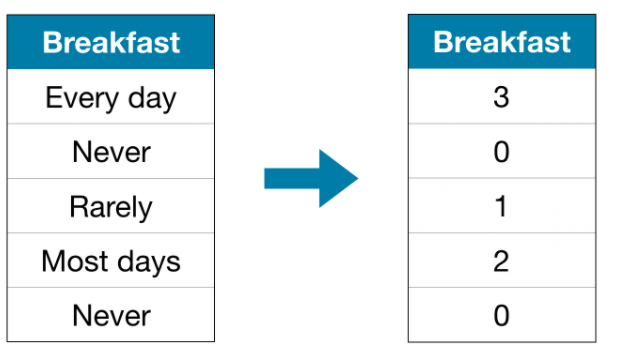

In [23]:
print('Label Encoding')
Image("IMAGES/3.png", width = 400)

One-Hot Encoding


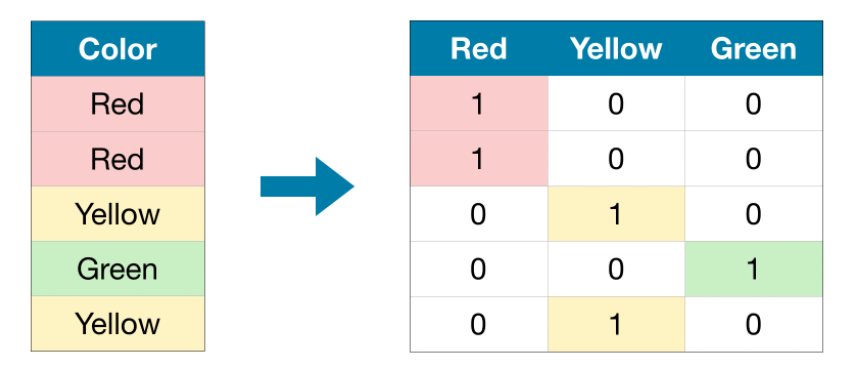

In [24]:
print('One-Hot Encoding')
Image("IMAGES/4.png", width = 400)

#### Label Encoding

To keep things simple we will focus only on categorical data and drop all collumns with missing values.
Keep in mind that the tranformations made on training dataset must be applied to test dataset. In most cases you will run into an error, if you have categories  in the training dataset different from the validation dataset. That means that we need to sellect categories with matching levels in trainining and test dataset.

In [25]:
data_2 = data.copy()
data_2 = data_2.dropna(axis =1 )
data_2.isnull().sum()

MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 61, dtype: int64

In [26]:
y = data_2.SalePrice
X = data_2.drop('SalePrice', axis = 1)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20, random_state=1)


# All categorical columns
object_cols = [col for col in X_train.columns if X_train[col].dtype == "object"]

# Columns that can be safely label encoded
good_label_cols = [col for col in object_cols if 
                   set(X_train[col]) == set(X_valid[col])]
        
# Problematic columns that will be dropped from the dataset
bad_label_cols = list(set(object_cols)-set(good_label_cols))
        
print('Categorical columns that will be label encoded:', good_label_cols)
print('\nCategorical columns that will be dropped from the dataset:', bad_label_cols)


Categorical columns that will be label encoded: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'BldgType', 'HouseStyle', 'ExterQual', 'CentralAir', 'KitchenQual', 'PavedDrive', 'SaleCondition']

Categorical columns that will be dropped from the dataset: ['HeatingQC', 'Exterior1st', 'Foundation', 'Heating', 'Condition2', 'ExterCond', 'RoofStyle', 'RoofMatl', 'SaleType', 'Exterior2nd', 'Functional', 'Condition1', 'Neighborhood', 'Utilities']


In [27]:
# Drop categorical columns that will not be encoded
label_X_train = X_train.drop(bad_label_cols, axis=1)
label_X_valid = X_valid.drop(bad_label_cols, axis=1)

In [28]:
from sklearn.preprocessing import LabelEncoder


# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in good_label_cols:
    label_X_train[col] = label_encoder.fit_transform(X_train[col])
    label_X_valid[col] = label_encoder.transform(X_valid[col])

# We got a better result
print("MAE from Approach 1 (Label Encoding):") 
print(score_dataset(label_X_train, label_X_valid, y_train, y_valid))

MAE from Approach 1 (Label Encoding):
16074.01039954338


#### One-Hot Encoding

* We set handle_unknown='ignore' to avoid errors when the validation data contains classes that aren't represented in the training data, and
* setting sparse=False ensures that the encoded columns are returned as a numpy array (instead of a sparse matrix).

In [29]:
data_2 = data.copy()
data_2 = data_2.dropna(axis =1 )
data_2.isnull().sum()
y = data_2.SalePrice
X = data_2.drop('SalePrice', axis = 1)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20, random_state=1)

# All categorical columns
object_cols = [col for col in X_train.columns if X_train[col].dtype == "object"]


In [30]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[object_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_valid.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

# we got a similar result, remember we only have one validation and training set. 
# the training dataset is different for label encoding and one-hot encoding.
print("MAE from Approach 2 (One-Hot Encoding):") 
print(score_dataset(OH_X_train, OH_X_valid, y_train, y_valid))

MAE from Approach 2 (One-Hot Encoding):
16089.301221461184


## Time to combine what you learned into a complete program. Let's create functions and try to retain as much information as possible.

* Split the data into training and validation.
* First step: use simple imputer for numerical and categorical data.
    * for categorical data we can use constant or most frequent as the simple imputer.
    * for the numerical value we will use mean.
* Second step: use one-hot encoding because we want to keep all columns.
* Third we will delete the original categorical data and use the one-hot encoded data. Afterward, we will combine the numerical da and categorical data into one dataset.
* fourth we will transform the validation dataset and test the progress.


In [31]:
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(exclude=['object']).columns
numerical_cols = list(numerical_cols)
numerical_cols.pop(-1)

'SalePrice'

In [32]:
#numerical_cols
#categorical_cols
data = pd.read_csv('data/train.csv', index_col = "Id")
y = data.SalePrice
X = data.drop('SalePrice', axis = 1)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20, random_state=1)

# Imputation for numerical columns
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train[numerical_cols]))
imputed_X_valid = pd.DataFrame(my_imputer.transform(X_valid[numerical_cols]))

# Imputation removed column names; put them back
imputed_X_train.columns = X_train[numerical_cols].columns
imputed_X_valid.columns = X_valid[numerical_cols].columns


# Imputation for categorical columns
my_imputer = SimpleImputer(strategy='most_frequent')
cat_X_train = pd.DataFrame(my_imputer.fit_transform(X_train[categorical_cols]))
cat_X_valid = pd.DataFrame(my_imputer.transform(X_valid[categorical_cols]))

# Imputation removed column names; put them back
cat_X_train.columns = X_train[categorical_cols].columns
cat_X_valid.columns = X_valid[categorical_cols].columns


# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(cat_X_train))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(cat_X_valid))

# One-hot encoding removed index; put it back
OH_cols_train.index = cat_X_train.index
OH_cols_valid.index = cat_X_valid.index


# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([imputed_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([imputed_X_valid, OH_cols_valid], axis=1)

# we got a similar result, remember we only have one validation and training set. 
# the training dataset is different for label encoding and one-hot encoding.
print("MAE from Approach 2 (One-Hot Encoding):") 
print(score_dataset(OH_X_train, OH_X_valid, y_train, y_valid))

MAE from Approach 2 (One-Hot Encoding):
16675.76075342466


## Cross-validation
Cross-validation is a method used to have a better estimate for model performance. Please watch this youtube video for an illustration of how cross-validation works. --> https://www.youtube.com/watch?v=fSytzGwwBVw . As you become comfortable with coding, you can create your cross-validation functions. However, python offers a function that makes the process straight forward.

How to prepare your data before cross-validation?
* For cross-validation you do not need to split the data into train and validation data sets. The function  cross_val_score will automatically split the data "cv" times into random "train" and "validation" sets. 
* Before giving your data to the function cross_val_score you need to clean the data ( That is, take care of the missing values, encode the categorical data, transform the data using simple imputer).

How to use python code to cross-validate?
* The correct way to use the cross_val_score is by using a pipeline. A pipeline is used to organize the data processing steps and modeling steps into a single object. When we use the cross-validation function we need to do it in a way to avoid data leakage. Follow the code below to see how to do it.
* The code is bellow.
* Also, please read to understand the parameters --> https://scikit-learn.org/stable/modules/cross_validation.html
* cv determines the cross-validation splitting strategy (number of splits in the data). For example 5-fold or 10-fold cross-validation.
* scoring is the method you use to evaluate how the model performs. In our case, it is the mean absolute error.
* The reason why we multiply by the scores by -1 is that the cross_val_score scoring parameter uses negative scoring functions. We multiply by -1 to get a positive score.

In [96]:
# prepare data before using the cross_val_score function
#numerical_cols
#categorical_cols
data = pd.read_csv('data/train.csv', index_col = "Id")
y = data.SalePrice
X = data.drop('SalePrice', axis = 1)
my_cols = list(categorical_cols) + list(numerical_cols)

from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='mean')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('onehot', OneHotEncoder(handle_unknown='ignore',sparse=False))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer,numerical_cols ),
        ('cat', categorical_transformer, categorical_cols)
    ])


# Define the model
model = RandomForestRegressor(n_estimators=100, random_state=0)

pipeline = Pipeline(steps = [
    ('preprocessor',preprocessor),
    ('model',model)
])

# now evaluate model


In [97]:
X_all = X[my_cols].copy()
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(pipeline, X_all, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

In [98]:
scores

array([17830.68873288, 17325.80849315, 17966.50753425, 15866.5519863 ,
       19100.79869863])

In [99]:
np.mean(scores)

17618.071089041096

On average, our model has a 17617.12 mean absolute error. This is a better overview of the performance of the model compared to our first approach. Also notice that we did not split the data into the train and validation set. Additionally, we got a greater mean absolute error compared to when we split the data once - which is not good. As you mature you will be able to use different techniques to avoid overfitting and systematically choose which features or columns should be used to optimize the modeling of the data. 

### Cross-validate  Manually - Another way to go about it.
Another way to cross-validate is to create random training datasets and corresponding test datasets manually. It is more work but you have more control of how you want things to work.
This is how you do it. As you have noticed we have indexes that identify each row of data. We will make a list of indexes, shuffle them 3 times and divide them into two groups. One group will contain 80% of indexes and the other will contain 20%.

In [176]:
# get the indexes of the entere dataset
list(data.index)
print(list(data.index)[0:10])
# see how many indexes
print(len(data.index))
# see how many indexes correspond to 80%
print(len(data.index)* 0.8)
print(len(data.index)* 0.2)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
1460
1168.0
292.0


In [177]:
# shuffle data to get different indexes every time we run
import random
index = list(data.index)
copy = index.copy()
random.shuffle(copy)
print(index[0:5])
print(copy[0:5])


[1, 2, 3, 4, 5]
[140, 453, 1399, 463, 813]


In [211]:
# create 3 different sets of training indexes and corresponding test indexes
# save
saved = list()
for i in range(3):
    copy = index.copy()
    random.shuffle(copy)
    saved.append((copy[0:1168],copy[1168:]))
 

In [212]:
print(len(saved[0][0]),len(saved[0][1]))

1168 292


The "saved" object contains information about which rows to use for training and testing. The way we select rows according to their index is by using the loc method, like so:

In [213]:
data.loc[[3,490]]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
490,180,RM,21.0,1526,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,86000


In [214]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='mean')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('onehot', OneHotEncoder(handle_unknown='ignore',sparse=False))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer,numerical_cols ),
        ('cat', categorical_transformer, categorical_cols)
    ])


# Define the model
model = RandomForestRegressor(n_estimators=100, random_state=0)

pipeline = Pipeline(steps = [
    ('preprocessor',preprocessor),
    ('model',model)
])

In [215]:
train_1 = saved[0][0]
validate_1 = saved[0][1]
train_2 = saved[1][0]
validate_2 = saved[1][1]
train_3 = saved[2][0]
validate_3 = saved[2][1]

In [216]:
data = data.copy()
my_cols = list(categorical_cols) + list(numerical_cols)
keep_scores = list()

# train data
x_train = data.loc[train_1]
y_train = x_train.SalePrice
x_train = x_train.drop('SalePrice', axis = 1)

# validate data

x_valid = data.loc[validate_1 ]
y_valid = x_valid.SalePrice
x_valid = x_valid.drop('SalePrice', axis = 1)


# Fit the model
pipeline.fit(x_train,y_train)

# Get predictions
predictions = pipeline.predict(x_valid)# Your code here

# Calculate MAE
mae = mean_absolute_error(predictions, y_valid)
print("Mean Absolute Error:" , mae)
keep_scores.append(mae)


Mean Absolute Error: 18567.472671232874


In [217]:
# train data
x_train = data.loc[train_2]
y_train = x_train.SalePrice
x_train = x_train.drop('SalePrice', axis = 1)

# validate data

x_valid = data.loc[validate_2]
y_valid = x_valid.SalePrice
x_valid = x_valid.drop('SalePrice', axis = 1)


# Fit the model
pipeline.fit(x_train,y_train)

# Get predictions
predictions = pipeline.predict(x_valid)# Your code here

# Calculate MAE
mae = mean_absolute_error(predictions, y_valid)
print("Mean Absolute Error:" , mae)
keep_scores.append(mae)


Mean Absolute Error: 17224.01671232877


In [218]:
# train data
x_train = data.loc[train_3]
y_train = x_train.SalePrice
x_train = x_train.drop('SalePrice', axis = 1)

# validate data

x_valid = data.loc[validate_3]
y_valid = x_valid.SalePrice
x_valid = x_valid.drop('SalePrice', axis = 1)


# Fit the model
pipeline.fit(x_train,y_train)

# Get predictions
predictions = pipeline.predict(x_valid)# Your code here

# Calculate MAE
mae = mean_absolute_error(predictions, y_valid)
print("Mean Absolute Error:" , mae)
keep_scores.append(mae)


Mean Absolute Error: 17175.92352739726


In [219]:
keep_scores

[18567.472671232874, 17224.01671232877, 17175.92352739726]

In [220]:
print("The average mean absolute error for the pipeline model is", np.mean(keep_scores))

The average mean absolute error for the pipeline model is 17655.804303652967


The more folds of data you obtain the more you will see how the model performs given different data points.
The best way to organize the code is by creating a function that you can iterate to perform similar tasks. However, for this tutorial, I want to make sure you see in detail what I am doing.

### XGBRegressor model
Getting boring of the Random Forest model? Well, today it is very easy to use different models even though you do not understand how they work. Please refer to the bellow resource where a professional data scientist explains about XGB Regressor.

XGBRegressor --> https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/


In [ ]:
from xgboost import XGBRegressor


data = pd.read_csv('data/train.csv', index_col = "Id")
y = data.SalePrice
X = data.drop('SalePrice', axis = 1)


my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05,random_state =0)

pipeline = Pipeline(steps = [
    ('preprocessor',preprocessor),
    ('model',my_model)
])



scores = -1 * cross_val_score(pipeline, X, y, cv=5, scoring = "neg_mean_absolute_error")

In [223]:
print("The average mean absolute error for the XGR Regressor is", np.mean(keep_scores))

The average mean absolute error for the XGR Regressor is 17655.804303652967


### Takeaways :
* We tried different methods, some worked better than others. It is your time as a data scientist to continue to experiment with different procedures and see what works better. Do not forget to think about the problem and understand the data. Too much information does not always mean better.
* The point of cross-validation is to evaluate the model's performance.
* Suggestions: 
    * Decide which columns you should label encode or one-hot encode.
    * Understand what other parameters you can change within the SimpleImputer() and OneHotEncoder()
    * Understand the code.
    * Read the python code documentation for all functions used for this tutorial.
    * change the parameters of the Random Forest Regressor.
    * change the parameters for the XGB Regressor.
    * Understand how XGB Regressor works.
    